In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
from pylab import rcParams
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import inset_axes

from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import seaborn
import pandas
import csv
from matplotlib import markers
import matplotlib.font_manager as font_manager


c:\users\nsha457\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data=pandas.read_csv('kholodenko_ALL_data.csv') 
Data={}
kholodenko={}
labels=[]
for label in data:
    labels.append(label)
    Data[label]=[] 
    Data[label].append(data[label])
# labels for cellml data
for label in labels:
    for cell in Data[label]:
        kholodenko[label]=[]  
        for c in cell:
            kholodenko[label].append(c)
labels

['environment | time (second)',
 'combined_concs | totEGFRphos (nanomolar)',
 'combined_concs | totGrb_EGFR (nanomolar)',
 'combined_concs | totGrb_Shc (nanomolar)',
 'combined_concs | totPLCgammaphos (nanomolar)',
 'combined_concs | totShc_EGFR (nanomolar)',
 'combined_concs | totShcphos (nanomolar)',
 'combined_concs | totSOS_EGFR (nanomolar)',
 'EGF | EGF (nanomolar)',
 "EGF | EGF' (nanomolar/second)",
 'G_S | G_S (nanomolar)',
 "G_S | G_S' (nanomolar/second)",
 'Grb | Grb (nanomolar)',
 "Grb | Grb' (nanomolar/second)",
 'PLC_gamma | PLC_gamma (nanomolar)',
 "PLC_gamma | PLC_gamma' (nanomolar/second)",
 'PLC_gamma_P | PLC_gamma_P (nanomolar)',
 "PLC_gamma_P | PLC_gamma_P' (nanomolar/second)",
 'PLC_gamma_P_I | PLC_gamma_P_I (nanomolar)',
 "PLC_gamma_P_I | PLC_gamma_P_I' (nanomolar/second)",
 'R | R (nanomolar)',
 "R | R' (nanomolar/second)",
 'R2 | R2 (nanomolar)',
 "R2 | R2' (nanomolar/second)",
 'R_G | R_G (nanomolar)',
 "R_G | R_G' (nanomolar/second)",
 'R_G_S | R_G_S (nanomolar)

In [3]:
time_100_1=kholodenko['environment | time (second)']; 
time_100_01= np.linspace(0,100,1001)
time_1000_01= np.linspace(0,1000,10001)

In [4]:
# Opening csv files

# corresponding to the negative feedback in the composed model
composed_MKKKP_TF={}; composed_MKKPP_TF={}; composed_MKPP_TF={}; 
Tr = [0.9, 1, 1.1]          # Negative feedback strength in BG model
for T in Tr:
    composed_MKKKP_TF[T]=[]
    with open('composed_MKKKP_TF{:}.csv'.format(T),'rt')as f:
        data = csv.reader(f)
        for row in data:
            for number in row:
                composed_MKKKP_TF[T].append(round(float(number),10))
                
for T in Tr:
    composed_MKKPP_TF[T]=[]
    with open('composed_MKKPP_TF{:}.csv'.format(T),'rt')as f:
        data = csv.reader(f)
        for row in data:
            for number in row:
                composed_MKKPP_TF[T].append(round(float(number),10))
                
for T in Tr:
    composed_MKPP_TF[T]=[]
    with open('composed_MKPP_TF{:}.csv'.format(T),'rt')as f:
        data = csv.reader(f)
        for row in data:
            for number in row:
                composed_MKPP_TF[T].append(round(float(number),10))
                
# corresponding to the kinases in the composed model (without FB)
composed_noFB={};
kinases=['composed_MK', 'composed_MKP', 'composed_MKPP','composed_MKK', 'composed_MKKP', 'composed_MKKPP', \
         'composed_Ras','composed_MKKK','composed_MKKKP'] 
for kinase in kinases:  
    with open('{:}.csv'.format(kinase),'rt') as f:
        data = csv.reader(f)
        composed_noFB[kinase]=[]
        for row in data:
            for number in row:
                composed_noFB[kinase].append(round(float(number),10))
               
                
# EGFR fitting results
EGFR_fitting={};
fits=['fit_R_PL','fit_R_Sh_G_S','fit_RP','fit_PLC_gamma_P']  

for fit in fits:  
    with open('{:}.csv'.format(fit),'rt') as f:
        data = csv.reader(f)
        EGFR_fitting[fit]=[]
        for row in data:
            for number in row:
                EGFR_fitting[fit].append(round(float(number),10))
            

# Tracking the kinases behaviour in the MAPK module
michael_kinases={}
kinases=['michael_MKKKK', 'michael_MKKK', 'michael_MKKKP', 'michael_MKK', 'michael_MKKP', 'michael_MKKPP', \
         'michael_MK', 'michael_MKP', 'michael_MKPP']

for kinase in kinases:  
    with open('{:}.csv'.format(kinase),'rt') as f:
        data = csv.reader(f)
        michael_kinases[kinase]=[]
        for row in data:
            for number in row:
                michael_kinases[kinase].append(round(float(number),10))
                
# Tracking the steady state behaviour in the MAPK module
michael_ss={}
ss={'michael_MK_ss', 'michael_MKK_ss', 'michael_MKK_ss', 'michael_MKKKP_ss', 'michael_MKKP_ss', \
    'michael_MKKPP_ss', 'michael_MKP_ss', 'michael_MKPP_ss'}

for s in ss:  
    with open('{:}.csv'.format(s),'rt') as f:
        data = csv.reader(f)
        michael_ss[s]=[]
        for row in data:
            for number in row:
                michael_ss[s].append(round(float(number),10))

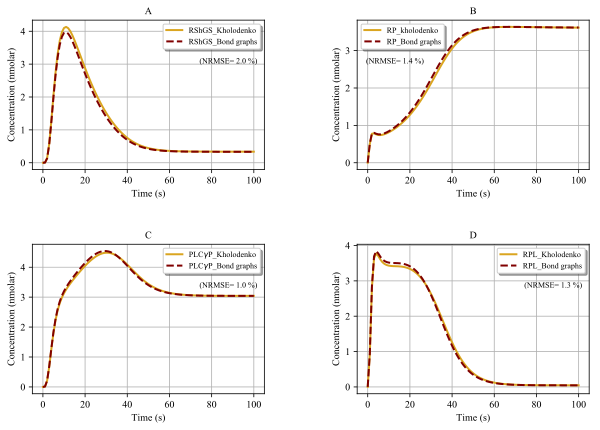

In [5]:
# EGFR module

RMSE_RShGS=np.sqrt(sum([(a-b)**2 for a,b in zip(EGFR_fitting['fit_R_Sh_G_S'],kholodenko['R_Sh_G_S | R_Sh_G_S (nanomolar)'])])/len(EGFR_fitting['fit_R_Sh_G_S']))
RMSE_percent_RShGS=RMSE_RShGS/(max(kholodenko['R_Sh_G_S | R_Sh_G_S (nanomolar)'])-min(kholodenko['R_Sh_G_S | R_Sh_G_S (nanomolar)']))*100

RMSE_RP=np.sqrt(sum([(a-b)**2 for a,b in zip(EGFR_fitting['fit_RP'],kholodenko['RP | RP (nanomolar)'])])/len(EGFR_fitting['fit_RP']))
RMSE_percent_RP=RMSE_RP/(max(kholodenko['RP | RP (nanomolar)'])-min(kholodenko['RP | RP (nanomolar)']))*100

RMSE_PLC_gamma_P=np.sqrt(sum([(a-b)**2 for a,b in zip(EGFR_fitting['fit_PLC_gamma_P'],kholodenko['PLC_gamma_P | PLC_gamma_P (nanomolar)'])])/len(EGFR_fitting['fit_PLC_gamma_P']))
RMSE_percent_PLC_gamma_P=RMSE_PLC_gamma_P/(max(kholodenko['PLC_gamma_P | PLC_gamma_P (nanomolar)'])-min(kholodenko['PLC_gamma_P | PLC_gamma_P (nanomolar)']))*100

RMSE_RPL=np.sqrt(sum([(a-b)**2 for a,b in zip(EGFR_fitting['fit_R_PL'],kholodenko['R_PL | R_PL (nanomolar)'])])/len(EGFR_fitting['fit_R_PL']))
RMSE_percent_RPL=RMSE_RPL/(max(kholodenko['R_PL | R_PL (nanomolar)'])-min(kholodenko['R_PL | R_PL (nanomolar)']))*100


%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.ticker as ticker


f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = ticker.FuncFormatter(g)

f.set_scientific(True)
f.set_powerlimits((-1,1)) 

mpl.rc('font',family='Times New Roman')
rcParams['figure.figsize'] = 10, 8

colors1 = ['goldenrod', 'steelblue', 'maroon', 'darkorange']
colors2 = ['goldenrod', 'c', 'pink', 'peru']


fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.0 )
subs=['A','B','C','D']

axs[0,0].plot(time_100_1[0:101], kholodenko['R_Sh_G_S | R_Sh_G_S (nanomolar)'],colors2[0], linewidth=2, label='RShGS_Kholodenko') 
axs[0,0].plot(time_100_1[0:101], EGFR_fitting['fit_R_Sh_G_S'],colors1[2], linewidth=2,linestyle='--', label='RShGS_Bond graphs')    
axs[0,0].yaxis.set_major_formatter(f)
legend = axs[0,0].legend(loc='best', shadow=True, fontsize='8')
axs[0,0].set_xlabel('Time (s)',fontname='Times New Roman', fontsize='10')
axs[0,0].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='10')  
axs[0,0].set_title(subs[0],fontsize=10, fontweight='bold')
axs[0,0].grid()
axs[0,0].text(0.72,0.71, "(NRMSE= {:.1f} %)".format(RMSE_percent_RShGS), fontsize='8',fontweight='bold',transform=axs[0,0].transAxes)


axs[0,1].plot(time_100_1[0:101], kholodenko['RP | RP (nanomolar)'],colors2[0], linewidth=2, label='RP_kholodenko')
axs[0,1].plot(time_100_1[0:101], EGFR_fitting['fit_RP'],colors1[2], linewidth=2,linestyle='--',  label='RP_Bond graphs')    
axs[0,1].yaxis.set_major_formatter(f)
legend = axs[0,1].legend(loc='best', shadow=True, fontsize='8')
axs[0,1].set_xlabel('Time (s)',fontname='Times New Roman', fontsize='10')
axs[0,1].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='10')  
axs[0,1].set_title(subs[1],fontsize=10, fontweight='bold')
axs[0,1].grid()
axs[0,1].text(0.038,0.71, "(NRMSE= {:.1f} %)".format(RMSE_percent_RP), fontsize='8',fontweight='bold',transform=axs[0,1].transAxes)



axs[1,0].plot(time_100_1[0:101], kholodenko['PLC_gamma_P | PLC_gamma_P (nanomolar)'],colors2[0], linewidth=2, label='PLC$\gamma$P_Kholodenko') 
axs[1,0].plot(time_100_1[0:101], EGFR_fitting['fit_PLC_gamma_P'],colors1[2], linewidth=2,linestyle='--',  label='PLC$\gamma$P_Bond graphs')    
axs[1,0].yaxis.set_major_formatter(f)
legend = axs[1,0].legend(loc='best', shadow=True, fontsize='8')
axs[1,0].set_xlabel('Time (s)',fontname='Times New Roman', fontsize='10')
axs[1,0].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='10')  
axs[1,0].set_title(subs[2],fontsize=10, fontweight='bold')
axs[1,0].grid()
axs[1,0].text(0.72,0.71, "(NRMSE= {:.1f} %)".format(RMSE_percent_PLC_gamma_P), fontsize='8',fontweight='bold',transform=axs[1,0].transAxes)


axs[1,1].plot(time_100_1[0:101], kholodenko['R_PL | R_PL (nanomolar)'],colors2[0], linewidth=2, label='RPL_Kholodenko') 
axs[1,1].plot(time_100_1[0:101], EGFR_fitting['fit_R_PL'],colors1[2], linewidth=2,linestyle='--',  label='RPL_Bond graphs')    
axs[1,1].yaxis.set_major_formatter(f)
legend = axs[1,1].legend(loc='best', shadow=True, fontsize='8')
axs[1,1].set_xlabel('Time (s)',fontname='Times New Roman', fontsize='10')
axs[1,1].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='10')  
axs[1,1].set_title(subs[3],fontsize=10, fontweight='bold')
axs[1,1].grid()
axs[1,1].text(0.72,0.71, "(NRMSE= {:.1f} %)".format(RMSE_percent_RPL), fontsize='8',fontweight='bold',transform=axs[1,1].transAxes)


plt.subplots_adjust(top = 0.85, bottom=0.2, hspace=0.5, wspace=0.4)

plt.savefig('EGFR_fitting.svg', dpi=300)

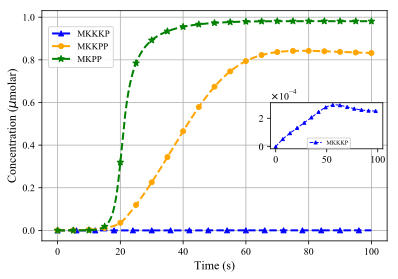

In [6]:
# MAPK module Activated kinases

%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.ticker as ticker


f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = ticker.FuncFormatter(g)

f.set_scientific(True)
f.set_powerlimits((-1,1)) 

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=9)

mpl.rc('font',family='Times New Roman')
rcParams['figure.figsize'] = 6,4

colors = ['blue', 'orange', 'green']

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.63, 0.42, 0.26, 0.16])

ax1.plot(time_100_01, michael_kinases['michael_MKKKP'],colors[0],marker= '^',markevery=60,ms=5,linestyle='--', linewidth=2, label='MKKKP')
ax1.plot(time_100_01, michael_kinases['michael_MKKPP'],colors[1],marker= 'o',markevery=50,ms=5,linestyle='--', linewidth=2, label='MKKPP')
ax1.plot(time_100_01, michael_kinases['michael_MKPP'],colors[2],marker= '*',markevery=50,ms=7, linestyle='--', linewidth=2, label='MKPP')
ax2.plot(time_100_01, michael_kinases['michael_MKKKP'],colors[0],marker= '^',markevery=70,ms=3,linestyle='--', linewidth=1, label='MKKKP')
ax2.yaxis.set_major_formatter(f)


# ax1.set_title('MAPK cascade bond graph module', fontsize='12')
ax1.legend(bbox_to_anchor=(0.22, 0.95), prop=font )
ax2.legend(bbox_to_anchor=(0.3,0.3), fontsize='6')
ax1.set_xlabel('Time (s)',fontname='Times New Roman', fontsize='12')
ax1.set_ylabel('Concentration ($\mu$molar)',fontname='Times New Roman', fontsize='12')  
ax1.grid()

plt.savefig('ultrasensitivity.svg', dpi=300)

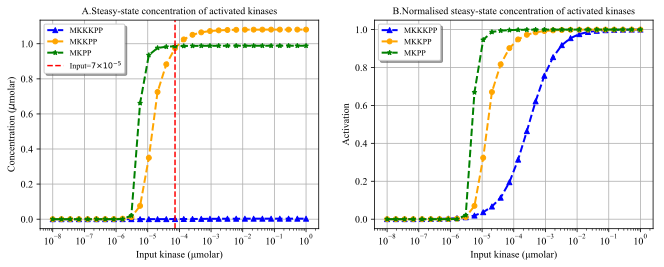

In [42]:
# MAPK module steady state

clamps = np.logspace(-8,0,num=30)
SS=[michael_ss['michael_MKKKP_ss'],michael_ss['michael_MKKPP_ss'],michael_ss['michael_MKPP_ss']]
SS_max=[max(michael_ss['michael_MKKKP_ss']) , max(michael_ss['michael_MKKPP_ss']), max(michael_ss['michael_MKPP_ss'])]



%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.ticker as ticker


f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = ticker.FuncFormatter(g)

f.set_scientific(True)
f.set_powerlimits((-1,1)) 

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=9)

mpl.rc('font',family='Times New Roman')
rcParams['figure.figsize'] = 11,5


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(bottom=0.3)
i=0

for c,l,m in zip(['blue', 'orange', 'green'],['MKKKPP', 'MKKPP', 'MKPP'],['^','o','*']):
    ax2.set_xscale('log')
    ax2.plot(clamps, [a/SS_max[i] for a in SS[i]] , color=c, label=l, marker=m ,markevery=1,ms=5,linestyle='--',linewidth=2)
    i+=1
    
    legend = ax2.legend(loc='best', shadow=True, fontsize='8')
    ax2.set_xlabel('Input kinase ($\mathregular{\mu molar}$)',fontname='Times New Roman', fontsize='10')
    ax2.set_ylabel('Activation',fontname='Times New Roman', fontsize='10')  
    ax2.set_title('B.Normalised steasy-state concentration of activated kinases',fontsize=10, fontweight='bold')
    ax2.grid()
    


i=0

for c,l,m in zip(['blue', 'orange', 'green'],['MKKKPP', 'MKKPP', 'MKPP'],['^','o','*']):
    ax1.set_xscale('log')
    ax1.plot(clamps, SS[i] , color=c, label=l, marker=m ,markevery=1,ms=5,linestyle='--',linewidth=2)
    i+=1

    
    ax1.set_xlabel('Input kinase ($\mathregular{\mu molar}$)',fontname='Times New Roman', fontsize='10')
    ax1.set_ylabel('Concentration ($\mu$molar)',fontname='Times New Roman', fontsize='10')  
    ax1.set_title('A.Steasy-state concentration of activated kinases',fontsize=10, fontweight='bold')
    ax1.grid()
ax1.axvline(x=clamps[14]  , color='r', linestyle='--', label='Input={:}'.format(fmt(round(clamps[14],5))))
legend = ax1.legend(loc='best', shadow=True, fontsize='8')
plt.savefig('mapk SS.svg', dpi=300)

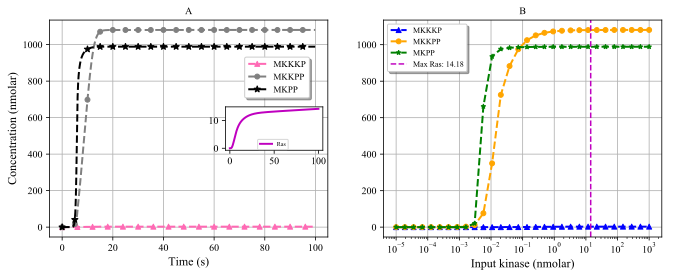

In [15]:
# Composed model (no FB)

clamps = np.logspace(-8,0,num=30)
SS=[michael_ss['michael_MKKKP_ss'],michael_ss['michael_MKKPP_ss'],michael_ss['michael_MKPP_ss']]


%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.ticker as ticker


f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = ticker.FuncFormatter(g)

f.set_scientific(True)
f.set_powerlimits((-1,1)) 

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=9)

mpl.rc('font',family='Times New Roman')
colors = [ 'hotpink' ,'grey','k']

fig, ax = plt.subplots( 1, 2, figsize=(11, 4) )
plt.subplots_adjust(hspace = 0.0 )


ax[0].plot( time_1000_01[0:1000], composed_noFB['composed_MKKKP'][0:1000], colors[0],marker= '^',markevery=60,ms=5,linestyle='--', linewidth=2, label='MKKKP')
ax[0].plot( time_1000_01[0:1000], composed_noFB['composed_MKKPP'][0:1000],colors[1],marker= 'o',markevery=50,ms=5,linestyle='--', linewidth=2, label='MKKPP')
ax[0].plot( time_1000_01[0:1000], composed_noFB['composed_MKPP'][0:1000], colors[2],marker= '*',markevery=50,ms=7, linestyle='--', linewidth=2, label='MKPP')
# ax[0].plot(time_1000_01[0:1000], composed_noFB['composed_Ras'][0:1000],'m',linewidth=2)

ax[0].grid()
ax[0].legend(bbox_to_anchor=(0.95, 0.85), prop=font , shadow=True)
ax[0].set_xlabel('Time (s)',fontname='Times New Roman', fontsize='12')
ax[0].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='12')  
ax[0].set_title('A',fontsize=10, fontweight='bold')
# create an inset axe in the current axe:
inset_ax = inset_axes(ax[0],
                      height="20%", # set height
                      width="35%", # and width
                      loc=5) # center, you can check the different codes in plt.legend?
inset_ax.plot(time_1000_01[0:1000], composed_noFB['composed_Ras'][0:1000],'m', linewidth=2, label='Ras')
inset_ax.legend(bbox_to_anchor=(0.3,0.32), fontsize='6')


i=0
for c,l,m in zip(['b', 'orange', 'green'],['MKKKP','MKKPP', 'MKPP'],['^','o','*']):
    ax[1].set_xscale('log')
    ax[1].plot([a*1000 for a in clamps], [a*1000 for a in SS[i]] , color=c, label=l, marker=m ,markevery=1,ms=5,linestyle='--',linewidth=2)
    i+=1
    
    
    ax[1].set_xlabel('Input kinase (nmolar)',fontname='Times New Roman', fontsize='12')
#     ax[1].set_ylabel('Concentration (nmolar)',fontname='Times New Roman', fontsize='12')  
    
ax[1].axvline(x=composed_noFB['composed_Ras'][1000], color='m', linestyle='--', label='Max Ras: 14.18')
legend = ax[1].legend(loc='best', shadow=True, fontsize='8')
ax[1].set_title('B',fontsize=10, fontweight='bold')
ax[1].grid()




plt.savefig('composed_noFB.svg', dpi=300)

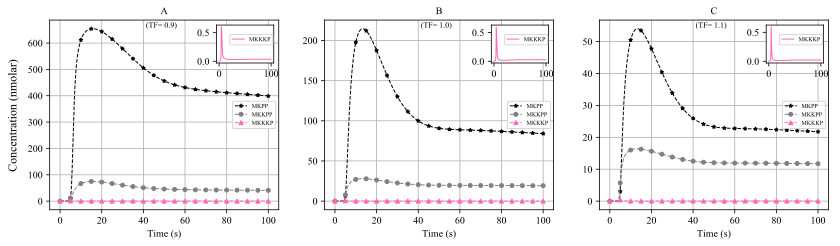

In [401]:
# Composed model (negative FB)

%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.ticker as ticker


f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = ticker.FuncFormatter(g)

f.set_scientific(True)
f.set_powerlimits((-1,1)) 

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=9)

mpl.rc('font')
rcParams['figure.figsize'] = 14,3.5


fig, (axs) = plt.subplots(1, 3)
plt.subplots_adjust(hspace = 0.0 )
sub=['A','B','C']
colors = [ 'hotpink' ,'grey','k']

i=0
for t in Tr:
    axs[i].plot(time_1000_01[0:1001],composed_MKPP_TF[t][0:1001], label='MKPP', color=colors[2], marker='*' ,markevery=50,ms=4,linestyle='--',linewidth=1)
    axs[i].plot(time_1000_01[0:1001],composed_MKKPP_TF[t][0:1001], label='MKKPP', color=colors[1], marker='o' ,markevery=50,ms=4,linestyle='--',linewidth=1)
    axs[i].plot(time_1000_01[0:1001],composed_MKKKP_TF[t][0:1001], label='MKKKP', color=colors[0], marker='^' ,markevery=50,ms=4,linestyle='--',linewidth=1)
    inset_ax = inset_axes(axs[i],
                      height="20%", # set height
                      width="25%", # and width
                      loc='upper right') 
    inset_ax.plot(time_1000_01[0:1001], composed_MKKKP_TF[t][0:1001], label='MKKKP', color=colors[0],linewidth=1)
    inset_ax.legend(bbox_to_anchor=(0.18,0.4), fontsize='6')   
    axs[i].legend(loc='center right',  fontsize='6')
    axs[i].grid() 
    axs[i].set_title(sub[i],fontsize=10, fontweight='bold')
    axs[i].text(0.42,0.96, "(TF= {:.1f})".format(t), fontsize='8',fontweight='bold',transform=axs[i].transAxes)
    axs[i].set_xlabel('Time (s)')

    i+=1
fig.text(0.089, 0.5, 'Concentration (nmolar)',fontname='Times New Roman', fontsize='12', ha='center', va='center', rotation='vertical')    
plt.savefig('feedback.svg', dpi=300)   